In [12]:
import pandas as pd
import statsmodels.formula.api as smf


link = r'http://d396qusza40orc.cloudfront.net/statistics/lec_resources/states.csv'
df = pd.read_csv(link)


model = smf.ols(formula='poverty ~ hs_grad', data=df)
result = model.fit()
summ = result.summary()
summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                poverty   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     61.81
Date:                Sun, 28 Nov 2021   Prob (F-statistic):           3.11e-10
Time:                        22:10:53   Log-Likelihood:                -108.74
No. Observations:                  51   AIC:                             221.5
Df Residuals:                      49   BIC:                             225.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     64.7810      6.803      9.523      0.000      51.111      78.451
hs_grad       -0.6212      0.079     -7.862      0.000      -0.780      -0.462
==============================================================================
Omnibus:                        3.534   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.171   Jarque-Bera (JB):                2.653
Skew:                           0.540   Prob(JB):                        0.265
Kurtosis:                       3.289   Cond. No.                     2.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

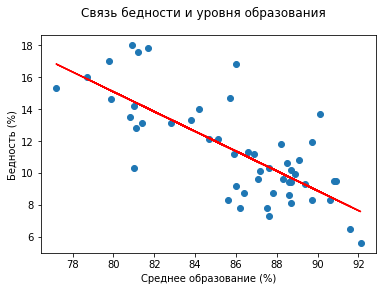

In [13]:
from matplotlib.pyplot import scatter
from matplotlib import pyplot as plt
import numpy as np


y = df['poverty']
X = df['hs_grad']
b1, b0 = np.polyfit(X, y, 1)

fig, ax = plt.subplots()
ax.plot(X, b0 + b1*X, color='red')
fig.suptitle('Связь бедности и уровня образования')
ax.set_ylabel('Бедность (%)')
ax.set_xlabel('Среднее образование (%)')
ax.scatter(X, y)

In [14]:
print('Statistic', 'N', 'mean', 'std', 'min', 'max')
print('poverty', len(y), round(y.mean(), 1), round(y.std(), 1), np.min(y), np.max(y))
print('hs_grad', len(X), round(X.mean(), 1), round(X.std(), 1), np.min(X), np.max(X))

Statistic N mean std min max
poverty 51 11.3 3.1 5.6 18.0
hs_grad 51 86.0 3.7 77.2 92.1


lillieforsResult (0.11523985402607873, 0.09082373008889003)
ShapiroResult(statistic=0.9680377244949341, pvalue=0.1831192970275879)


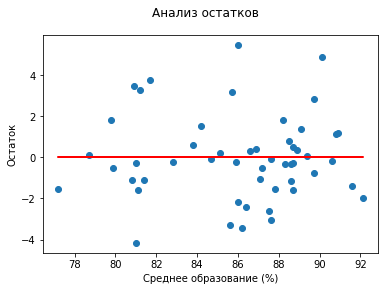

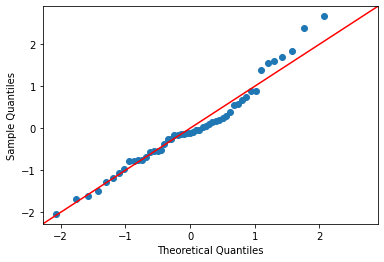

In [15]:
# Q-Q plot for residuals + test SW and Lilliefors
import statsmodels.api as sm
from statsmodels.stats.diagnostic import lilliefors
from scipy.stats import shapiro

res = result.resid
residuals = y - (b1 * X + b0)

fig, ax = plt.subplots()
ax.plot(X, [0 for i in range(len(X))], color='red')
fig.suptitle('Анализ остатков')
ax.set_ylabel('Остаток')
ax.set_xlabel('Среднее образование (%)')
ax.scatter(X, residuals)

res = result.resid
fig2 = sm.qqplot(res, fit=True, line="45")

print('lillieforsResult', lilliefors(residuals))
print(shapiro(residuals))